## 1. Credit card applications
<p>Commercial banks receive <em>a lot</em> of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low income levels, or too many inquiries on an individual's credit report, for example. Manually analyzing these applications is mundane, error-prone, and time-consuming (and time is money!). Luckily, this task can be automated with the power of machine learning and pretty much every commercial bank does so nowadays. In this notebook, we will build an automatic credit card approval predictor using machine learning techniques, just like the real banks do.</p>
<p><img src="https://assets.datacamp.com/production/project_558/img/credit_card.jpg" alt="Credit card being held in hand"></p>
<p>We'll use the <a href="http://archive.ics.uci.edu/ml/datasets/credit+approval">Credit Card Approval dataset</a> from the UCI Machine Learning Repository. The structure of this notebook is as follows:</p>
<ul>
<li>First, we will start off by loading and viewing the dataset.</li>
<li>We will see that the dataset has a mixture of both numerical and non-numerical features, that it contains values from different ranges, plus that it contains a number of missing entries.</li>
<li>We will have to preprocess the dataset to ensure the machine learning model we choose can make good predictions.</li>
<li>After our data is in good shape, we will do some exploratory data analysis to build our intuitions.</li>
<li>Finally, we will build a machine learning model that can predict if an individual's application for a credit card will be accepted.</li>
</ul>
<p>First, loading and viewing the dataset. We find that since this data is confidential, the contributor of the dataset has anonymized the feature names.</p>

In [43]:
# Import pandas
# ... YOUR CODE FOR TASK 1 ...

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

# Load dataset
cc_apps_original = pd.read_csv("F:/IVY PRO SHOOL/Python/IVY Capstone Final Project/IVY-Capstone_Project_Predicting Credit Card Approvals/Predicting Credit Card Approvals/datasets/cc_approvals.data",header= None,encoding='utf-8',engine ='python')
cc_apps=cc_apps_original.copy()

# Inspect data
# ... YOUR CODE FOR TASK 1 ...
cc_apps.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+


## 2. Inspecting the applications
<p>The output may appear a bit confusing at its first sight, but let's try to figure out the most important features of a credit card application. The features of this dataset have been anonymized to protect the privacy, but <a href="http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html">this blog</a> gives us a pretty good overview of the probable features. The probable features in a typical credit card application are <code>Gender</code>, <code>Age</code>, <code>Debt</code>, <code>Married</code>, <code>BankCustomer</code>, <code>EducationLevel</code>, <code>Ethnicity</code>, <code>YearsEmployed</code>, <code>PriorDefault</code>, <code>Employed</code>, <code>CreditScore</code>, <code>DriversLicense</code>, <code>Citizen</code>, <code>ZipCode</code>, <code>Income</code> and finally the <code>ApprovalStatus</code>. This gives us a pretty good starting point, and we can map these features with respect to the columns in the output.   </p>
<p>As we can see from our first glance at the data, the dataset has a mixture of numerical and non-numerical features. This can be fixed with some preprocessing, but before we do that, let's learn about the dataset a bit more to see if there are other dataset issues that need to be fixed.</p>

In [44]:
# Print summary statistics
cc_apps_description = cc_apps.describe()
print(cc_apps_description)

print("\n")

# Print DataFrame information
cc_apps_info = cc_apps.info()
print(cc_apps_info)

print("\n")

# Inspect missing values in the dataset
# ... YOUR CODE FOR TASK 2 ...
cc_apps.tail(5)

               2           7          10             14
count  690.000000  690.000000  690.00000     690.000000
mean     4.758725    2.223406    2.40000    1017.385507
std      4.978163    3.346513    4.86294    5210.102598
min      0.000000    0.000000    0.00000       0.000000
25%      1.000000    0.165000    0.00000       0.000000
50%      2.750000    1.000000    0.00000       5.000000
75%      7.207500    2.625000    3.00000     395.500000
max     28.000000   28.500000   67.00000  100000.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 no

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,00000,0,-


## 2.A Exploratory Data Analysis (EDA)

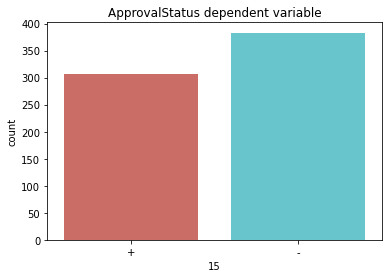

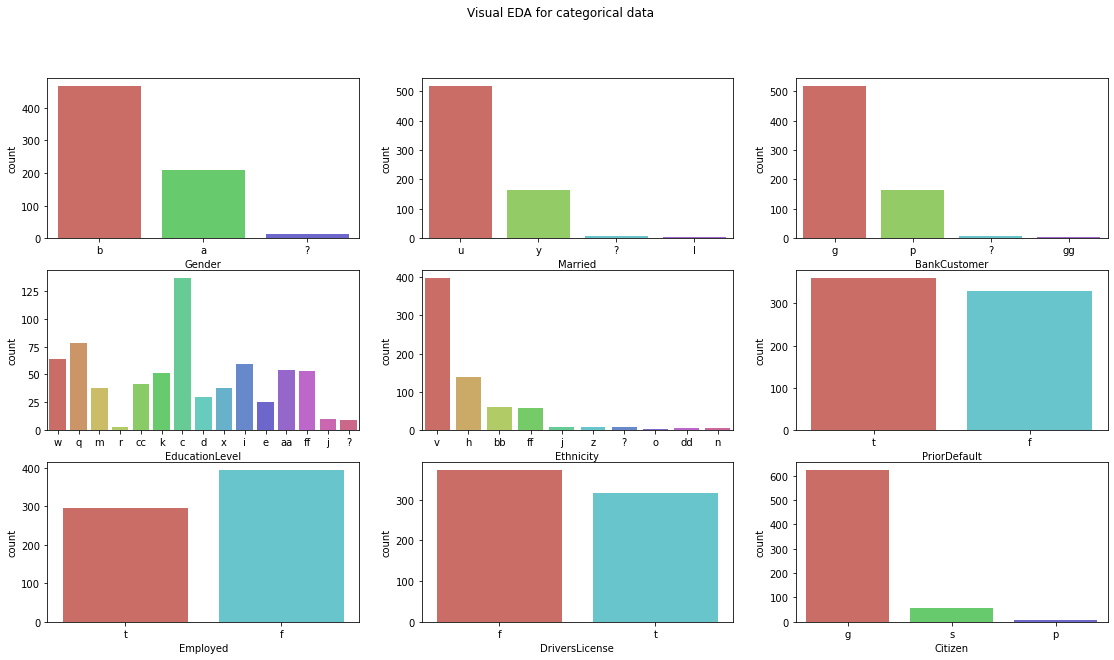

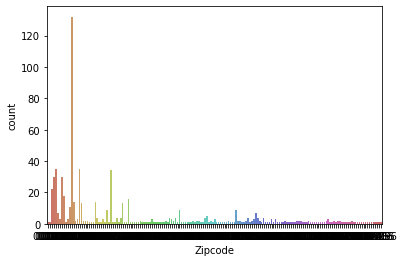

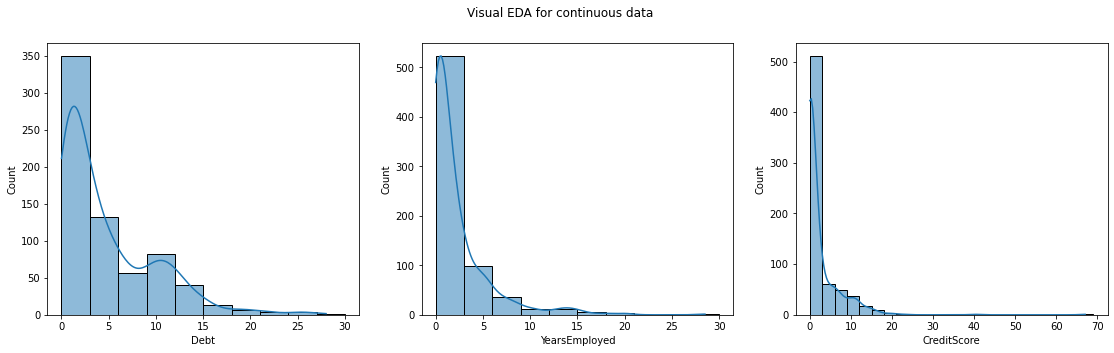

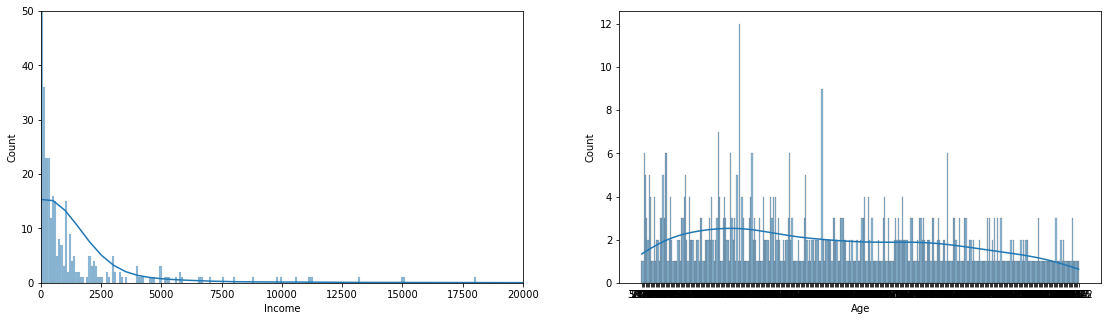

In [183]:
# EDA
# ApprovalStatus description
sns.countplot(x=cc_apps[15],data=cc_apps, palette='hls')
plt.title("ApprovalStatus dependent variable")
plt.show()

# Visual EDA for categorical data
names ={ 0:'Gender', 
         3:'Married', 
         4:'BankCustomer', 
         5:'EducationLevel', 
         6:'Ethnicity', 
         8:'PriorDefault', 
         9:'Employed', 
         11:'DriversLicense', 
         12:'Citizen'
        }
x,y=(0,0)
fig, axes = plt.subplots(3,3,figsize=(19,10))
fig.suptitle("Visual EDA for categorical data")
for i in cc_apps:
    if cc_apps[i].dtype == 'object' and cc_apps[i].name != 1 and cc_apps[i].name != 13 and cc_apps[i].name != 15:
        sns.countplot(x=cc_apps[i], data=cc_apps, palette='hls',ax=axes[x][y]).set(xlabel=names[i])
        if y==2:
            x=x+1
            y=0
        else:
            y=y+1
plt.show()
# Zipcode description
sns.countplot(x=cc_apps[13],data=cc_apps, palette='hls')
plt.xlabel("Zipcode")
plt.show()

# Visual EDA for continuous data
con_names ={ 2:'Debt', 
         7:'YearsEmployed', 
         10:'CreditScore'
        }
a=0
fig, axes = plt.subplots(1,3,figsize=(19,5))
fig.suptitle("Visual EDA for continuous data")
for i in cc_apps:
    if cc_apps[i].dtype != 'object'  and cc_apps[i].name != 14:
        sns.histplot(x=cc_apps[i], data=cc_apps,ax=axes[a],kde=True,binwidth=3).set(xlabel=con_names[i])
        a=a+1
plt.show()

fig, axes = plt.subplots(1,2,figsize=(19,5))
sns.histplot(x=cc_apps[14], data=cc_apps,ax=axes[0],kde=True).set(xlim=(0,20000),ylim=(0,50),xlabel='Income')
sns.histplot(x=cc_apps[1], data=cc_apps,ax=axes[1],kde=True)
plt.xlabel("Age")
plt.show()

## 3. Handling the missing values (part i)
<p>We've uncovered some issues that will affect the performance of our machine learning model(s) if they go unchanged:</p>
<ul>
<li>Our dataset contains both numeric and non-numeric data (specifically data that are of <code>float64</code>, <code>int64</code> and <code>object</code> types). Specifically, the features 2, 7, 10 and 14 contain numeric values (of types float64, float64, int64 and int64 respectively) and all the other features contain non-numeric values.</li>
<li>The dataset also contains values from several ranges. Some features have a value range of 0 - 28, some have a range of 2 - 67, and some have a range of 1017 - 100000. Apart from these, we can get useful statistical information (like <code>mean</code>, <code>max</code>, and <code>min</code>) about the features that have numerical values. </li>
<li>Finally, the dataset has missing values, which we'll take care of in this task. The missing values in the dataset are labeled with '?', which can be seen in the last cell's output.</li>
</ul>
<p>Now, let's temporarily replace these missing value question marks with NaN.</p>

In [45]:
# Import numpy
# ... YOUR CODE FOR TASK 3 ...
import numpy as np

# Inspect missing values in the dataset
print(cc_apps.isnull().sum())

# Replace the '?'s with NaN
cc_apps = cc_apps.replace('?', np.NaN)

# Inspect the missing values again
# ... YOUR CODE FOR TASK 3 ...
cc_apps.tail(17)

# Print DataFrame information
cc_apps_info1 = cc_apps.info()
print(cc_apps_info1)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       678 non-null    object 
 1   1       678 non-null    object 
 2   2       690 non-null    float64
 3   3       684 non-null    object 
 4   4       684 non-null    object 
 5   5       681 non-null    object 
 6   6       681 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      677 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB
None


## 4. Handling the missing values (part ii)
<p>We replaced all the question marks with NaNs. This is going to help us in the next missing value treatment that we are going to perform.</p>
<p>An important question that gets raised here is <em>why are we giving so much importance to missing values</em>? Can't they be just ignored? Ignoring missing values can affect the performance of a machine learning model heavily. While ignoring the missing values our machine learning model may miss out on information about the dataset that may be useful for its training. Then, there are many models which cannot handle missing values implicitly such as LDA. </p>
<p>So, to avoid this problem, we are going to impute the missing values with a strategy called mean imputation.</p>

In [46]:
for col in cc_apps:
    if cc_apps[col].dtype != 'object':
        # Impute the missing values with mean imputation
        cc_apps[col].fillna(np.mean, inplace=True)


# Count the number of NaNs in the dataset to verify
# ... YOUR CODE FOR TASK 4 ...
print(cc_apps.isnull().sum())


0     12
1     12
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13    13
14     0
15     0
dtype: int64


## 5. Handling the missing values (part iii)
<p>We have successfully taken care of the missing values present in the numeric columns. There are still some missing values to be imputed for columns 0, 1, 3, 4, 5, 6 and 13. All of these columns contain non-numeric data and this why the mean imputation strategy would not work here. This needs a different treatment. </p>
<p>We are going to impute these missing values with the most frequent values as present in the respective columns. This is <a href="https://www.datacamp.com/community/tutorials/categorical-data">good practice</a> when it comes to imputing missing values for categorical data in general.</p>

In [47]:
# Iterate over each column of cc_apps
for col in cc_apps:
    # Check if the column is of object type
    if cc_apps[col].dtype == 'object':
        # Impute with the most frequent value
        cc_apps[col].fillna(cc_apps[col].mode()[0],inplace=True)
cc_apps[1]=cc_apps[1].astype(np.float64)


# Count the number of NaNs in the dataset and print the counts to verify
# ... YOUR CODE FOR TASK 5 ...
print(cc_apps.isnull().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64


## 5.A Outlier treatment

In [48]:
# Outlier treatment of YearsEmployed column
print(cc_apps[7][cc_apps[7]>15].sort_values(ascending=False),"\n")
cc_apps[7][cc_apps[7]>18]=18

# Outlier treatment of CreditScore column
print(cc_apps[10][cc_apps[10]>15].sort_values(ascending=False),"\n")
cc_apps[10][cc_apps[10]>23]=23

# Outlier treatment of Income column
print(cc_apps[14][cc_apps[14]>5000].sort_values(ascending=False),"\n")
cc_apps[14][cc_apps[14]>18027]=18027

44     28.5
250    20.0
221    20.0
212    18.0
586    17.5
549    16.0
197    15.5
Name: 7, dtype: float64 

121    67
44     40
46     23
180    20
105    20
507    19
27     17
20     17
557    16
505    16
209    16
Name: 10, dtype: int64 

317    100000
132     51100
65      50000
6       31285
243     26726
245     18027
67      15108
180     15000
584     13212
117     11202
167     11177
164     10561
29      10000
237      9800
217      8851
575      8000
160      7544
230      7059
234      6700
205      6590
496      5860
52       5800
588      5777
284      5552
561      5298
445      5200
589      5124
Name: 14, dtype: int64 



## 5.B Feature Selection

## Visual exploration of relationship between variables
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Box Plot
* Categorical Vs Categorical---- Grouped Bar Plots

## Statistical measurement of relationship strength between variables
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test

In this case study the Target variable is Categorical, hence below two scenarios will be present
* Categorical Target Variable Vs Continuous Predictor 
* Categorical Target Variable Vs Categorical Predictor

## Relationship exploration: Categorical Vs Continuous -- Box Plots

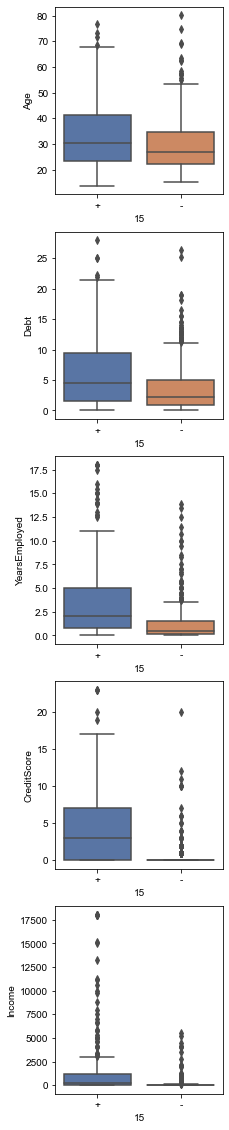

In [7]:
# Box plots for Categorical Target Variable "Price" and continuous predictors
CategoricalColsList=[1,2,7,10,14]
boxnames ={ 1:'Age', 
         2:'Debt', 
         7:'YearsEmployed', 
         10:'CreditScore', 
         14:'Income'
        }

fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(3,20))

# Creating box plots for each continuous predictor against the Target Variable "Price"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    sns.set_theme(style="whitegrid")
    sns.boxplot(x=cc_apps[15], y=cc_apps[PredictorCol], ax=PlotCanvas[i], data=cc_apps).set(ylabel=boxnames[PredictorCol])


## Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

In [8]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [9]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=[1,2,7,10,14]
FunctionAnova(inpData=cc_apps, TargetVariable=15, ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

1 is correlated with 15 | P-Value: 8.98927798830028e-06
2 is correlated with 15 | P-Value: 4.5516807023089123e-08
7 is correlated with 15 | P-Value: 9.212863436311608e-19
10 is correlated with 15 | P-Value: 3.5380366269684715e-37
14 is correlated with 15 | P-Value: 3.458608680253862e-13


[1, 2, 7, 10, 14]

## Relationship exploration: Categorical Vs Categorical -- Grouped Bar Charts

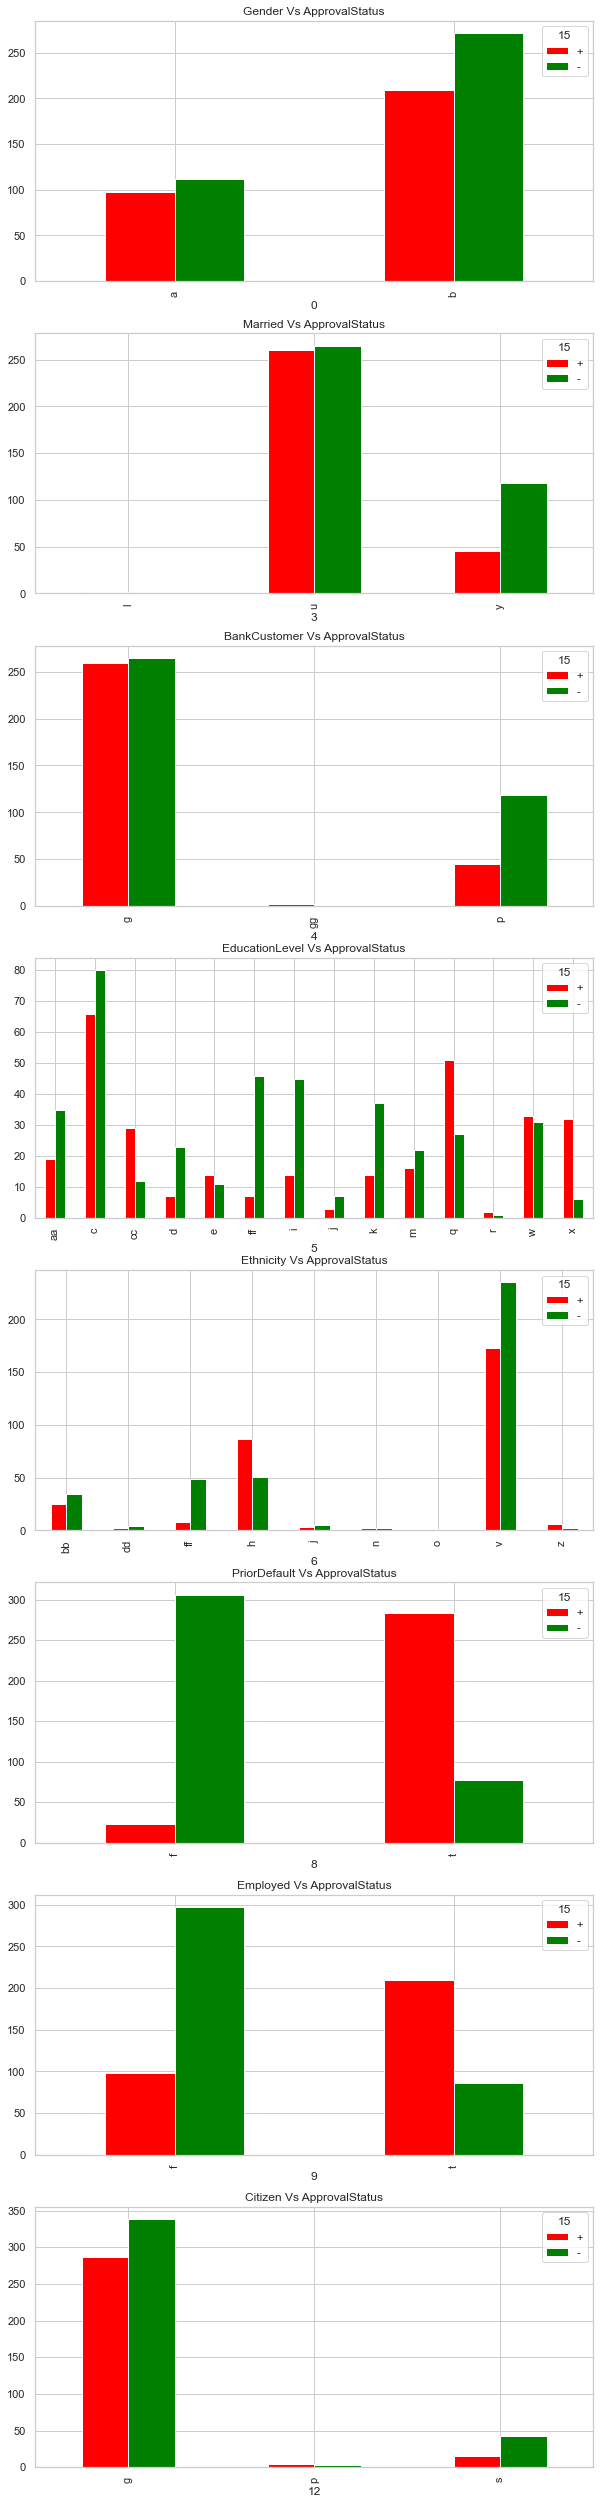

In [10]:
# Visual Inference using Grouped Bar charts
CategoricalColsList=[0,3,4,5,6,8,9,12]
CategoricalName = {0:'Gender',3:'Married',4:'BankCustomer',5:'EducationLevel',6:'Ethnicity',8:'PriorDefault',9:'Employed',12:'Citizen'}

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,45))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "Survived"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=cc_apps[CategoricalCol], columns=cc_apps[15])
    CrossTabResult.plot.bar(color=['red','green'], ax=PlotCanvas[i], title=CategoricalName[CategoricalCol]+' Vs '+'ApprovalStatus')

## Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test

In [11]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [12]:
CategoricalVariables=[0,3,4,5,6,8,9,12]

# Calling the function
FunctionChisq(inpData=cc_apps, 
              TargetVariable=15,
              CategoricalVariablesList= CategoricalVariables)

0 is NOT correlated with 15 | P-Value: 0.49853461823239964
3 is correlated with 15 | P-Value: 1.5978512968629162e-06
4 is correlated with 15 | P-Value: 1.5978512968629162e-06
5 is correlated with 15 | P-Value: 3.5029870661019782e-15
6 is correlated with 15 | P-Value: 3.6499165389844843e-07
8 is correlated with 15 | P-Value: 3.1185900878457007e-79
9 is correlated with 15 | P-Value: 5.675727374527571e-33
12 is correlated with 15 | P-Value: 0.010094291370456362


[3, 4, 5, 6, 8, 9, 12]

## 6. Preprocessing the data (part i)
<p>The missing values are now successfully handled.</p>
<p>There is still some minor but essential data preprocessing needed before we proceed towards building our machine learning model. We are going to divide these remaining preprocessing steps into three main tasks:</p>
<ol>
<li>Convert the non-numeric data into numeric.</li>
<li>Split the data into train and test sets. </li>
<li>Scale the feature values to a uniform range.</li>
</ol>
<p>First, we will be converting all the non-numeric values into numeric ones. We do this because not only it results in a faster computation but also many machine learning models (like XGBoost) (and especially the ones developed using scikit-learn) require the data to be in a strictly numeric format. We will do this by using a technique called <a href="http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html">label encoding</a>.</p>

In [95]:
# Import LabelEncoder
# ... YOUR CODE FOR TASK 6 ...
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
# ... YOUR CODE FOR TASK 6 ...
le=LabelEncoder()

# Replace the '+'s with 1 and '-'s with 0
cc_apps[15] = cc_apps[15].replace('+', 1)
cc_apps[15] = cc_apps[15].replace('-', 0)

# Iterate over all the values of each column and extract their dtypes
columns_name = cc_apps.iloc[:,[0,3,4,5,6,8,9,11,12,15]].columns

for x in columns_name : 
    cc_apps[x] = le.fit_transform(cc_apps[x].astype(str))
print(cc_apps)

     0      1       2   3   4   5   6     7   8   9   10  11  12   13   14  15
0     1  30.83   0.000   1   0  12   7  1.25   1   1   1   0   0  159    0   1
1     0  58.67   4.460   1   0  10   3  3.04   1   1   6   0   0   78  560   1
2     0  24.50   0.500   1   0  10   3  1.50   1   0   0   0   0  116  824   1
3     1  27.83   1.540   1   0  12   7  3.75   1   1   5   1   0   49    3   1
4     1  20.17   5.625   1   0  12   7  1.71   1   0   0   0   2  137    0   1
..   ..    ...     ...  ..  ..  ..  ..   ...  ..  ..  ..  ..  ..  ...  ...  ..
685   1  21.08  10.085   2   2   4   3  1.25   0   0   0   0   0  107    0   0
686   0  22.67   0.750   1   0   1   7  2.00   0   1   2   1   0  148  394   0
687   0  25.25  13.500   2   2   5   2  2.00   0   1   1   1   0  148    1   0
688   1  17.92   0.205   1   0   0   7  0.04   0   0   0   0   0  116  750   0
689   1  35.00   3.375   1   0   1   3  8.29   0   0   0   1   0    0    0   0

[690 rows x 16 columns]


## 7. Splitting the dataset into train and test sets
<p>We have successfully converted all the non-numeric values to numeric ones.</p>
<p>Now, we will split our data into train set and test set to prepare our data for two different phases of machine learning modeling: training and testing. Ideally, no information from the test data should be used to scale the training data or should be used to direct the training process of a machine learning model. Hence, we first split the data and then apply the scaling.</p>
<p>Also, features like <code>DriversLicense</code> and <code>ZipCode</code> are not as important as the other features in the dataset for predicting credit card approvals. We should drop them to design our machine learning model with the best set of features. In Data Science literature, this is often referred to as <em>feature selection</em>. </p>

In [96]:
# Import train_test_split
# ... YOUR CODE FOR TASK 7 ...
from sklearn.model_selection import train_test_split

# Drop the features 11 and 13 and 0(as not correlated at 95% confidence level)and convert the DataFrame to a NumPy array
cc_apps = cc_apps.drop(cc_apps.columns[[0,11,13]], axis=1)
cc_apps = cc_apps.to_numpy()

# # Segregate features and labels into separate variables
X,y = cc_apps[:,0:-1] , cc_apps[:,12]

# # Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.25,
                                random_state=0)

## 8. Preprocessing the data (part ii)
<p>The data is now split into two separate sets - train and test sets respectively. We are only left with one final preprocessing step of scaling before we can fit a machine learning model to the data. </p>
<p>Now, let's try to understand what these scaled values mean in the real world. Let's use <code>CreditScore</code> as an example. The credit score of a person is their creditworthiness based on their credit history. The higher this number, the more financially trustworthy a person is considered to be. So, a <code>CreditScore</code> of 1 is the highest since we're rescaling all the values to the range of 0-1.</p>

In [97]:
# Import MinMaxScaler
# ... YOUR CODE FOR TASK 8 ...
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0,1))

rescaled_X_train = scaler.fit_transform(X_train)
rescaled_X_test=scaler.fit_transform(X_test)

# =============================================================================
# Recursive Feature Elimination for selecting Important Variables
# =============================================================================

# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression()
# rfe = RFE(logreg, n_features_to_select=5)
# rfe = rfe.fit(rescaled_X_train, y_train)
# # os_data_y.values.ravel()
# print(rfe.support_)
# len(rfe.ranking_)
# print(rfe.ranking_)
# print(rescaled_X_train.shape)
# print(rescaled_X_test.shape)

# RFE is not working in this model,after reducing 5 features then test accuracy increase by 3% but train accuracy decrease by 2%

# Using SMOTE
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)

#On Train Data
os_data_train_X , os_data_train_y = os.fit_sample(rescaled_X_train, y_train)

#On Test Data
os_data_test_X , os_data_test_y = os.fit_sample(rescaled_X_test, y_test)

## 9. Fitting a logistic regression model to the train set
<p>Essentially, predicting if a credit card application will be approved or not is a <a href="https://en.wikipedia.org/wiki/Statistical_classification">classification</a> task. <a href="http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.names">According to UCI</a>, our dataset contains more instances that correspond to "Denied" status than instances corresponding to "Approved" status. Specifically, out of 690 instances, there are 383 (55.5%) applications that got denied and 307 (44.5%) applications that got approved. </p>
<p>This gives us a benchmark. A good machine learning model should be able to accurately predict the status of the applications with respect to these statistics.</p>
<p>Which model should we pick? A question to ask is: <em>are the features that affect the credit card approval decision process correlated with each other?</em> Although we can measure correlation, that is outside the scope of this notebook, so we'll rely on our intuition that they indeed are correlated for now. Because of this correlation, we'll take advantage of the fact that generalized linear models perform well in these cases. Let's start our machine learning modeling with a Logistic Regression model (a generalized linear model).</p>

In [98]:
# Import LogisticRegression
# ... YOUR CODE FOR TASK 9 ...
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression(random_state=0,max_iter= 40, tol= 1e-08)

# Fit logreg to the train set
# ... YOUR CODE FOR TASK 9 ...
logreg.fit(rescaled_X_train, y_train)


# Get the accuracy score of logreg model and print it
print("Accuracy without SMOTE")
print("Accuracy of logistic regression classifier on train data: {:.2f}".format(logreg.score(rescaled_X_train, y_train)))
print("Accuracy of logistic regression classifier on test data: {:.2f}".format(logreg.score(rescaled_X_test, y_test)))

# =============================================================================
# Evaluating the Logistic Model With SMOTE
# =============================================================================

y_pred_test_SM  = logreg.predict(os_data_test_X)
y_pred_train_SM = logreg.predict(os_data_train_X)

print("\n Accuracy with SMOTE")
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(os_data_train_X, os_data_train_y)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(os_data_test_X, os_data_test_y)))

Accuracy without SMOTE
Accuracy of logistic regression classifier on train data: 0.87
Accuracy of logistic regression classifier on test data: 0.84

 Accuracy with SMOTE
Accuracy of logistic regression classifier on train set: 0.88
Accuracy of logistic regression classifier on test set: 0.85


## 10. Making predictions and evaluating performance
<p>But how well does our model perform? </p>
<p>We will now evaluate our model on the test set with respect to <a href="https://developers.google.com/machine-learning/crash-course/classification/accuracy">classification accuracy</a>. But we will also take a look the model's <a href="http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/">confusion matrix</a>. In the case of predicting credit card applications, it is equally important to see if our machine learning model is able to predict the approval status of the applications as denied that originally got denied. If our model is not performing well in this aspect, then it might end up approving the application that should have been approved. The confusion matrix helps us to view our model's performance from these aspects.  </p>

In [99]:
# Import confusion_matrix
# ... YOUR CODE FOR TASK 10 ...
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Use logreg to predict instances from the test set and store it
y_pred_test = logreg.predict(rescaled_X_test)
y_pred_train = logreg.predict(rescaled_X_train)

# Print the confusion matrix of the logreg model
# ... YOUR CODE FOR TASK 10 ...

# Evaluating the Logistic Model Without SMOTE
print("Evaluating the Logistic Model Without SMOTE \n")

print("Train data without SMOTE")
confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix_train)
print(classification_report(y_train, y_pred_train))

print("Test data without SMOTE")
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)
print(confusion_matrix_test)
print(classification_report(y_test, y_pred_test))

# Evaluating the Logistic Model With SMOTE
print("Evaluating the Logistic Model With SMOTE")

print("Train data with SMOTE")
print(confusion_matrix(os_data_train_y, y_pred_train_SM))
print(classification_report(os_data_train_y, y_pred_train_SM))

print("Test data with SMOTE")
print(confusion_matrix(os_data_test_y, y_pred_test_SM))
print(classification_report(os_data_test_y, y_pred_test_SM))

Evaluating the Logistic Model Without SMOTE 

Train data without SMOTE
[[243  46]
 [ 20 208]]
              precision    recall  f1-score   support

         0.0       0.92      0.84      0.88       289
         1.0       0.82      0.91      0.86       228

    accuracy                           0.87       517
   macro avg       0.87      0.88      0.87       517
weighted avg       0.88      0.87      0.87       517

Test data without SMOTE
[[80 14]
 [14 65]]
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85        94
         1.0       0.82      0.82      0.82        79

    accuracy                           0.84       173
   macro avg       0.84      0.84      0.84       173
weighted avg       0.84      0.84      0.84       173

Evaluating the Logistic Model With SMOTE
Train data with SMOTE
[[243  46]
 [ 26 263]]
              precision    recall  f1-score   support

         0.0       0.90      0.84      0.87       289
         1.0  

## 10.A logistic regression model using statsmodel

In [105]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score

os_data_train_X_df = pd.DataFrame(os_data_train_X)
os_data_train_y_df = pd.DataFrame(os_data_train_y)

os_data_train_X_df.columns = [ 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'Citizen', 'Income']
os_data_train_y_df.columns = ['ApprovalStatus']

os_data_train_X_df = os_data_train_X_df.drop("Employed",axis=1)
os_data_train_X_df = os_data_train_X_df.drop("Age",axis=1)
os_data_train_X_df = os_data_train_X_df.drop("Ethnicity",axis=1)
os_data_train_X_df = os_data_train_X_df.drop("Citizen",axis=1)
os_data_train_X_df = os_data_train_X_df.drop("YearsEmployed",axis=1)

log_sm = sm.Logit(os_data_train_y_df,os_data_train_X_df).fit()
print(log_sm.summary())
prediction_test= list(map(round,log_sm.predict(os_data_train_X_df)))

print("Train accuracy with SMOTE")
print(confusion_matrix(os_data_train_y_df, prediction_test))
print(classification_report(os_data_train_y_df,prediction_test))

Optimization terminated successfully.
         Current function value: 0.323457
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:         ApprovalStatus   No. Observations:                  578
Model:                          Logit   Df Residuals:                      571
Method:                           MLE   Df Model:                            6
Date:                Sun, 13 Dec 2020   Pseudo R-squ.:                  0.5334
Time:                        14:02:01   Log-Likelihood:                -186.96
converged:                       True   LL-Null:                       -400.64
Covariance Type:            nonrobust   LLR p-value:                 3.648e-89
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Debt              -0.1109      0.745     -0.149      0.882      -1.571       1.349
Married          

In [113]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score

os_data_test_X_df = pd.DataFrame(os_data_test_X)
os_data_test_y_df = pd.DataFrame(os_data_test_y)

os_data_test_X_df.columns = [ 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'Citizen', 'Income']
os_data_test_y_df.columns = ['ApprovalStatus']

os_data_test_X_df = os_data_test_X_df.drop("Employed",axis=1)
os_data_test_X_df = os_data_test_X_df.drop("Age",axis=1)
os_data_test_X_df = os_data_test_X_df.drop("Ethnicity",axis=1)
os_data_test_X_df = os_data_test_X_df.drop("Citizen",axis=1)
os_data_test_X_df = os_data_test_X_df.drop("YearsEmployed",axis=1)

log_sm = sm.Logit(os_data_test_y_df,os_data_test_X_df).fit()
print(log_sm.summary())
prediction_test= list(map(round,log_sm.predict(os_data_test_X_df)))

print("Test accuracy with SMOTE")
print(confusion_matrix(os_data_test_y_df, prediction_test))
print(classification_report(os_data_test_y_df,prediction_test))


Optimization terminated successfully.
         Current function value: 0.315575
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:         ApprovalStatus   No. Observations:                  188
Model:                          Logit   Df Residuals:                      181
Method:                           MLE   Df Model:                            6
Date:                Sun, 13 Dec 2020   Pseudo R-squ.:                  0.5447
Time:                        19:27:33   Log-Likelihood:                -59.328
converged:                       True   LL-Null:                       -130.31
Covariance Type:            nonrobust   LLR p-value:                 3.853e-28
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Debt              -1.4587      1.260     -1.158      0.247      -3.928       1.010
Married          

[Text(0, 0, 'Debt'),
 Text(1, 0, 'Married'),
 Text(2, 0, 'BankCustomer'),
 Text(3, 0, 'EducationLevel'),
 Text(4, 0, 'PriorDefault'),
 Text(5, 0, 'CreditScore'),
 Text(6, 0, 'Income')]

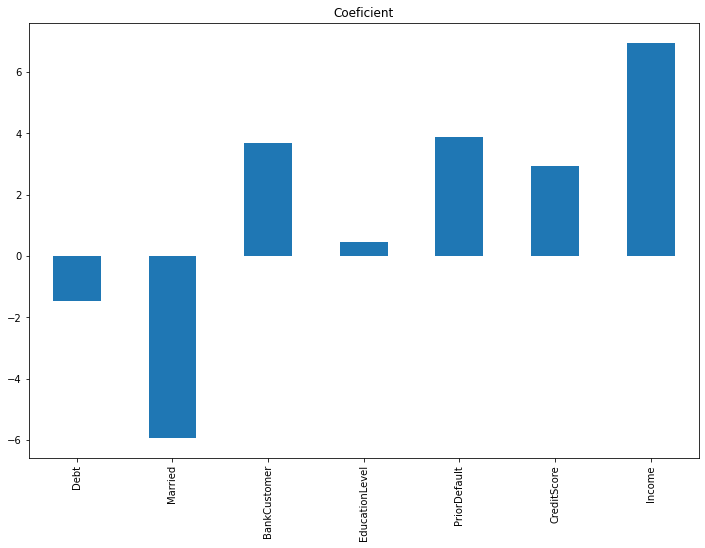

In [125]:
coeff=[-1.4587,-5.9327,3.6853,0.4488,3.8833,2.9429,6.9531]
coeff_series = pd.Series(coeff)
x_labels = ['Debt','Married','BankCustomer','EducationLevel','PriorDefault','CreditScore','Income']

plt.figure(figsize=(12,8))
ax = coeff_series.plot(kind='bar')
ax.set_title('Coeficient')
ax.set_xticklabels(x_labels)

## 11. Grid searching and making the model perform better
<p>Our model was pretty good! It was able to yield an accuracy score of almost 84%.</p>
<p>For the confusion matrix, the first element of the of the first row of the confusion matrix denotes the true negatives meaning the number of negative instances (denied applications) predicted by the model correctly. And the last element of the second row of the confusion matrix denotes the true positives meaning the number of positive instances (approved applications) predicted by the model correctly.</p>
<p>Let's see if we can do better. We can perform a <a href="https://machinelearningmastery.com/how-to-tune-algorithm-parameters-with-scikit-learn/">grid search</a> of the model parameters to improve the model's ability to predict credit card approvals.</p>
<p><a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">scikit-learn's implementation of logistic regression</a> consists of different hyperparameters but we will grid search over the following two:</p>
<ul>
<li>tol</li>
<li>max_iter</li>
</ul>

In [100]:
# Import GridSearchCV
# ... YOUR CODE FOR TASK 11 ...
from sklearn.model_selection import GridSearchCV

# Define the grid of values for tol and max_iter
tol = [1e-8,1e-4,1e-2,1]
max_iter = [40,100,500,1000,2500,5000]

# # Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol = tol,max_iter = max_iter)

## 12. Finding the best performing model
<p>We have defined the grid of hyperparameter values and converted them into a single dictionary format which <code>GridSearchCV()</code> expects as one of its parameters. Now, we will begin the grid search to see which values perform best.</p>
<p>We will instantiate <code>GridSearchCV()</code> with our earlier <code>logreg</code> model with all the data we have. Instead of passing train and test sets separately, we will supply <code>X</code> (scaled version) and <code>y</code>. We will also instruct <code>GridSearchCV()</code> to perform a <a href="https://www.dataschool.io/machine-learning-with-scikit-learn/">cross-validation</a> of five folds.</p>
<p>We'll end the notebook by storing the best-achieved score and the respective best parameters.</p>
<p>While building this credit card predictor, we tackled some of the most widely-known preprocessing steps such as <strong>scaling</strong>, <strong>label encoding</strong>, and <strong>missing value imputation</strong>. We finished with some <strong>machine learning</strong> to predict if a person's application for a credit card would get approved or not given some information about that person.</p>

In [101]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid = param_grid, cv=5)

# Use scaler to rescale X and assign it to rescaledX
rescaled_X = scaler.fit_transform(X)

# Fit data to grid_model
grid_model_result = grid_model.fit(rescaled_X, y)

# Summarize results
best_score, best_params = grid_model_result.best_score_,grid_model_result.best_params_
print("Best: accuracy score of %f using %s" % (best_score, best_params))

Best: accuracy score of 0.850725 using {'max_iter': 40, 'tol': 1e-08}
